In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
print("Libraries imported Sucessfully!")

Libraries imported Sucessfully!


In [2]:
# Creating Antecedent/Consequent objects
data_redundancy = ctrl.Antecedent(np.arange(0, 11, 1), 'data_redundancy')
degradation_level = ctrl.Antecedent(np.arange(0, 11, 1), 'degradation_level')
error_history = ctrl.Antecedent(np.arange(0, 11, 1), 'error_history')
error_likelihood = ctrl.Consequent(np.arange(0, 101, 1), 'error_likelihood')
correction_action = ctrl.Consequent(np.arange(0, 11, 1), 'correction_action')

#### Populating Fuzzy membership functions

In [3]:
# For Data Redundancy
data_redundancy['poor'] = fuzz.trimf(data_redundancy.universe, [0, 0, 5])
data_redundancy['average'] = fuzz.trimf(data_redundancy.universe, [2, 5, 8])
data_redundancy['optimal'] = fuzz.trimf(data_redundancy.universe, [5, 10, 10])

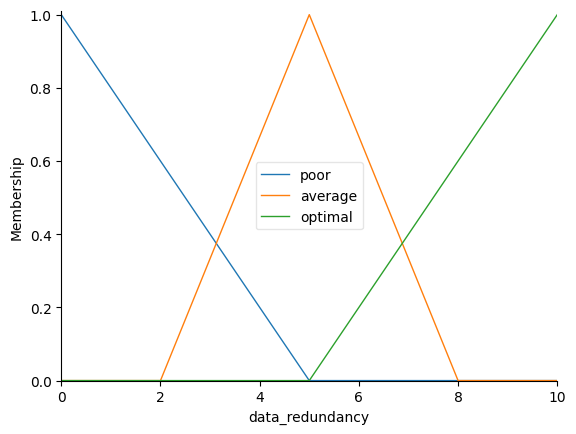

In [5]:
data_redundancy.view()

In [6]:
# For Degradation Level
degradation_level['poor'] = fuzz.trimf(degradation_level.universe, [0, 0, 5])
degradation_level['average'] = fuzz.trimf(degradation_level.universe, [2, 5, 8])
degradation_level['optimal'] = fuzz.trimf(degradation_level.universe, [5, 10, 10])

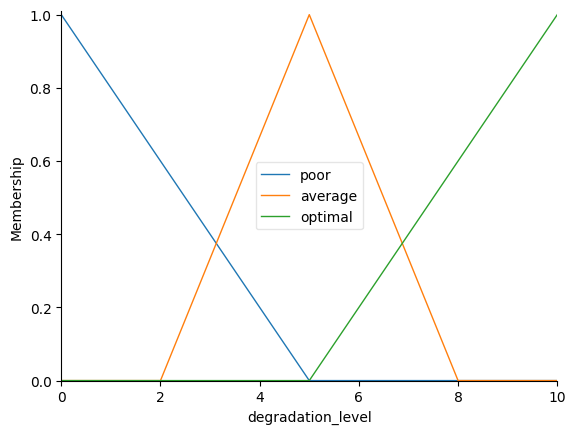

In [7]:
degradation_level.view()

In [8]:
# For Error History
error_history['poor'] = fuzz.trimf(error_history.universe, [0, 0, 5])
error_history['average'] = fuzz.trimf(error_history.universe, [2, 5, 8])
error_history['optimal'] = fuzz.trimf(error_history.universe, [5, 10, 10])

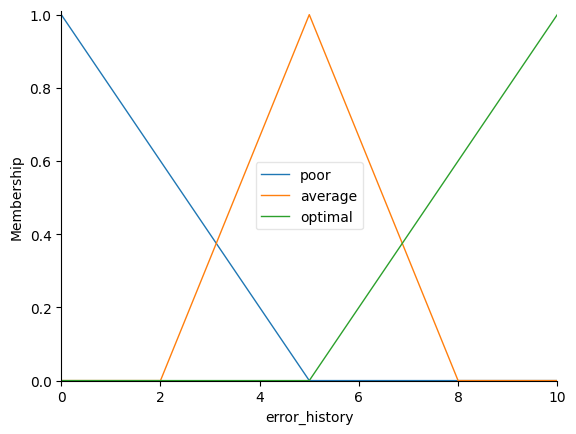

In [9]:
error_history.view()

In [10]:
error_likelihood['low'] = fuzz.trimf(error_likelihood.universe, [0, 0, 50])
error_likelihood['medium'] = fuzz.trimf(error_likelihood.universe, [25, 50, 75])
error_likelihood['high'] = fuzz.trimf(error_likelihood.universe, [50, 100, 100])

correction_action['minor'] = fuzz.trimf(correction_action.universe, [0, 0, 5])
correction_action['moderate'] = fuzz.trimf(correction_action.universe, [2, 5, 8])
correction_action['major'] = fuzz.trimf(correction_action.universe, [5, 10, 10])

#### Creating Fuzzy Rules

In [11]:
# Rules for Error Likelihood
rule1 = ctrl.Rule(degradation_level['poor'] & error_history['poor'] & data_redundancy['poor'], error_likelihood['low'])
rule2 = ctrl.Rule(degradation_level['poor'] & error_history['optimal'] & data_redundancy['optimal'], error_likelihood['low'])
rule3 = ctrl.Rule(degradation_level['average'] & error_history['average'] & data_redundancy['average'], error_likelihood['medium'])
rule4 = ctrl.Rule(degradation_level['optimal'] | error_history['average'] | data_redundancy['average'], error_likelihood['medium'])
rule5 = ctrl.Rule(degradation_level['optimal'] & error_history['optimal'] & data_redundancy['optimal'], error_likelihood['high'])
rule6 = ctrl.Rule(degradation_level['optimal'] & error_history['poor'] & data_redundancy['poor'], error_likelihood['high'])

In [12]:
# Rules for Error Correction Action
rule7 = ctrl.Rule(degradation_level['poor'] & error_history['poor'] & data_redundancy['poor'], correction_action['minor'])
rule8 = ctrl.Rule(degradation_level['poor'] & error_history['optimal'] & data_redundancy['optimal'], correction_action['minor'])
rule9 = ctrl.Rule(degradation_level['average'] & error_history['average'] & data_redundancy['average'], correction_action['moderate'])
rule10 = ctrl.Rule(degradation_level['optimal'] | error_history['average'] | data_redundancy['average'], correction_action['moderate'])
rule11 = ctrl.Rule(degradation_level['optimal'] & error_history['optimal'] & data_redundancy['optimal'], correction_action['major'])
rule12 = ctrl.Rule(degradation_level['optimal'] & error_history['poor'] & data_redundancy['poor'], correction_action['major'])

In [13]:
# Adding those rules to the control system
error_detection_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
error_detection = ctrl.ControlSystemSimulation(error_detection_ctrl)

error_correction_ctrl = ctrl.ControlSystem([rule7, rule8, rule9, rule10, rule11, rule12])
error_correction = ctrl.ControlSystemSimulation(error_correction_ctrl)


#### Testing

Error Likelihood: 57.184368737475
Correction Action: 6.291891891891892


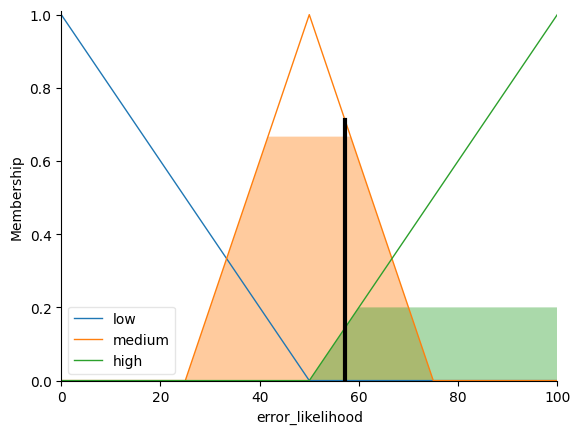

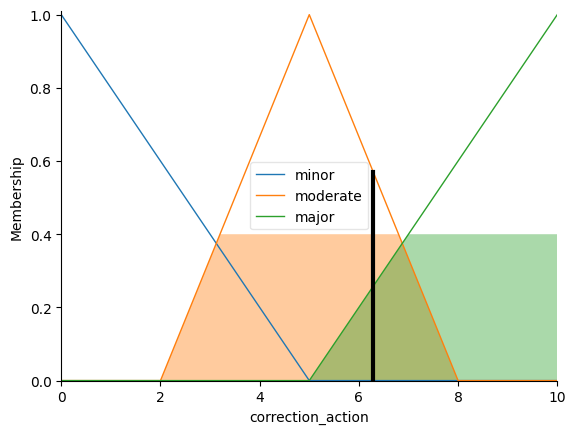

In [17]:
# Getting the user inputs
error_detection.input['degradation_level'] = float(input("Enter Degradation Level value (0-10) : "))
error_detection.input['error_history'] = float(input("Enter Error History value (0-10) : "))
error_detection.input['data_redundancy'] = float(input("Enter Data Redundancy value (0-10) : "))

error_detection.compute()
error_correction.compute()

print(f"Error Likelihood: {error_detection.output['error_likelihood']}")
print(f"Correction Action: {error_correction.output['correction_action']}")

error_likelihood.view(sim=error_detection)
correction_action.view(sim=error_correction)